# EXPLORATORY DATA ANALYSIS(EDA):
In statistics, exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics using visual methods.
It refers to a critical process of performing initial investigations on data so as to discover patterns, to spot anomalies, to test hypothesis and to check assumptions with help of summary statics and graphical representations.

# Global terrorism:
The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.

# Problem Statement:
Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’.
As a security/defense analyst, try to find out the hot zone of terrorism.

In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#pd.set_option('display.max_columns', 135)
#pd.set_option('display.max_rows', None)

In [2]:
#Importing the dataset using pandas
terror=pd.read_csv('globalterrorismdb_0718dist.csv',encoding = "ISO-8859-1")

C:\Users\SVNPSP\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 146.9+ MB


In [4]:
terror.corr()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999996,0.002706,0.018336,0.091761,-0.135039,0.401371,0.166886,0.003907,0.030641,...,-0.009990,-0.018001,-0.014094,-0.165422,0.256113,-0.181612,-0.143600,-0.133252,-0.077852,-0.175605
iyear,0.999996,1.000000,0.000139,0.018254,0.091754,-0.135023,0.401384,0.166933,0.003917,0.030626,...,-0.009984,-0.018216,-0.014238,-0.165375,0.256092,-0.181556,-0.143601,-0.133253,-0.077847,-0.175596
imonth,0.002706,0.000139,1.000000,0.005497,-0.000468,-0.006305,-0.002999,-0.015978,-0.003880,0.003621,...,-0.000710,0.046989,0.058878,-0.016597,0.011295,-0.011535,-0.002302,-0.002034,-0.002554,-0.006336
iday,0.018336,0.018254,0.005497,1.000000,-0.004700,0.003468,0.009710,0.003423,-0.002285,-0.006991,...,0.012755,-0.010502,0.003148,-0.006581,-0.006706,0.001765,-0.001540,-0.001621,-0.002027,-0.001199
extended,0.091761,0.091754,-0.000468,-0.004700,1.000000,-0.020466,0.038389,-0.024749,0.000523,0.057897,...,-0.008114,0.028177,0.001966,0.009367,0.233293,-0.192155,0.071768,0.075147,0.027335,0.080767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nreleased,-0.181612,-0.181556,-0.011535,0.001765,-0.192155,-0.044331,-0.149511,0.002790,-0.017745,-0.030631,...,0.054571,0.034843,0.049322,0.016832,-0.555478,1.000000,0.039388,0.040947,0.085055,0.064759
INT_LOG,-0.143600,-0.143601,-0.002302,-0.001540,0.071768,0.069904,-0.082584,-0.099827,0.002272,0.073022,...,0.035821,0.031079,0.007029,-0.045504,-0.015442,0.039388,1.000000,0.996211,0.052537,0.891051
INT_IDEO,-0.133252,-0.133253,-0.002034,-0.001621,0.075147,0.067564,-0.071917,-0.094470,0.002268,0.071333,...,0.039053,0.041983,0.013162,-0.039844,-0.016234,0.040947,0.996211,1.000000,0.082014,0.893811
INT_MISC,-0.077852,-0.077847,-0.002554,-0.002027,0.027335,0.207281,0.043139,0.097652,0.000371,-0.019197,...,0.023815,0.125162,0.037227,0.129274,-0.119776,0.085055,0.052537,0.082014,1.000000,0.252193


In [5]:
terror=terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country',
                        'region_txt':'Region','attacktype1_txt':'Attack_Type','target1':'Target','nkill':'Killed',
                        'nwound':'Wounded','gname':'Group','targtype1_txt':'Target_Type','weaptype1_txt':'Weapon_type',
                        'motive':'Motive'})
terror.head()

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [46]:
terror=terror[['Year','Month','Day','Country','Region','city','latitude','longitude','Attack_Type',
                    'Target','Killed','Wounded','Group','Target_Type','Weapon_type','Motive']]
terror

,Year,Month,Day,Country,Region,city,latitude,longitude,Attack_Type,Target,Killed,Wounded,Group,Target_Type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,Julio Guzman,1.0,0.0,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),"Nadine Chaval, daughter",0.0,0.0,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,Employee,1.0,0.0,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,U.S. Embassy,NaN,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,U.S. Consulate,NaN,NaN,Unknown,Government (Diplomatic),Incendiary,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Sub-Saharan Africa,Ceelka Geelow,2.359673,45.385034,Armed Assault,Checkpoint,1.0,2.0,Al-Shabaab,Military,Firearms,NaN
181687,2017,12,31,Syria,Middle East & North Africa,Jableh,35.407278,35.942679,Bombing/Explosion,Hmeymim Air Base,2.0,7.0,Muslim extremists,Military,Explosives,NaN
181688,2017,12,31,Philippines,Southeast Asia,Kubentog,6.900742,124.437908,Facility/Infrastructure Attack,Houses,0.0,0.0,Bangsamoro Islamic Freedom Movement (BIFM),Private Citizens & Property,Incendiary,NaN
181689,2017,12,31,India,South Asia,Imphal,24.798346,93.940430,Bombing/Explosion,Office,0.0,0.0,Unknown,Government (General),Explosives,NaN


In [44]:
# Checking the null values
terror.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
city              434
latitude         4556
longitude        4557
Attack_Type         0
Target            636
Killed          10313
Wounded         16311
Group               0
Target_Type         0
Weapon_type         0
Motive         131130
dtype: int64

In [60]:
#value_counts() provides unique value of the objects in the columno9
terror['Group'].value_counts()[1:5]

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Name: Group, dtype: int64

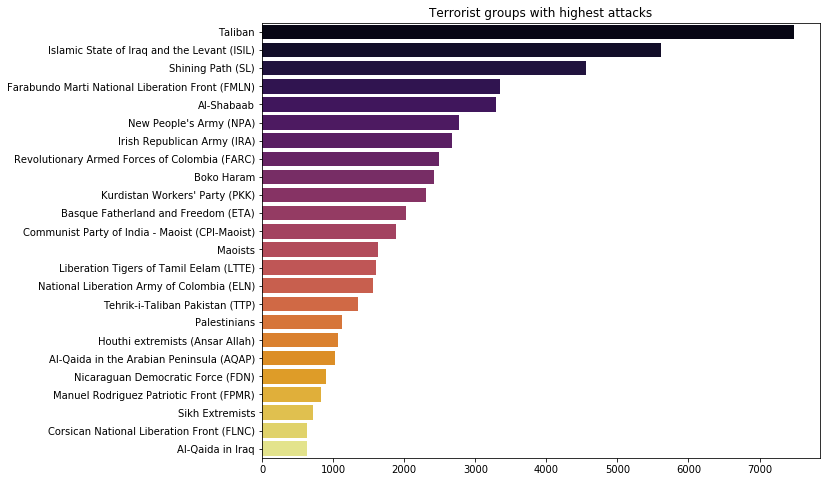

In [8]:
#To see which terrorist group has highest activity
sns.barplot(terror['Group'].value_counts()[1:25].values,
            terror['Group'].value_counts()[1:25].index,palette=('inferno'))
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist groups with highest attacks')
plt.show()

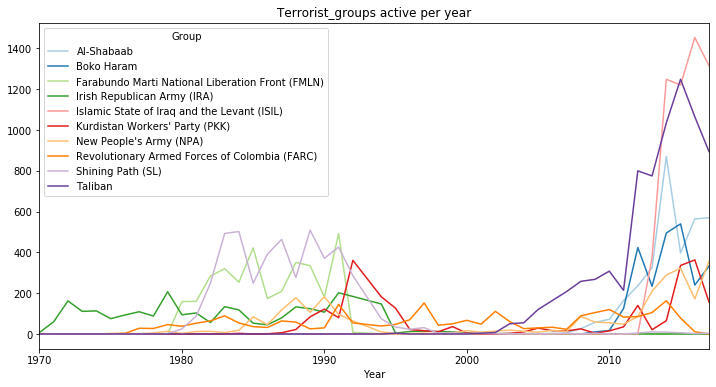

In [63]:
#Activity of terrorist group per year
top_groups=terror[terror['Group'].isin(terror['Group'].value_counts()[1:11].index)]
pd.crosstab(top_groups.Year,top_groups.Group).plot(color=sns.color_palette('Paired'))
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.title('Terrorist_groups active per year')
plt.show()

In [21]:
terror['Country'].value_counts()[:5]

Iraq           24636
Pakistan       14368
Afghanistan    12731
India          11960
Colombia        8306
Name: Country, dtype: int64

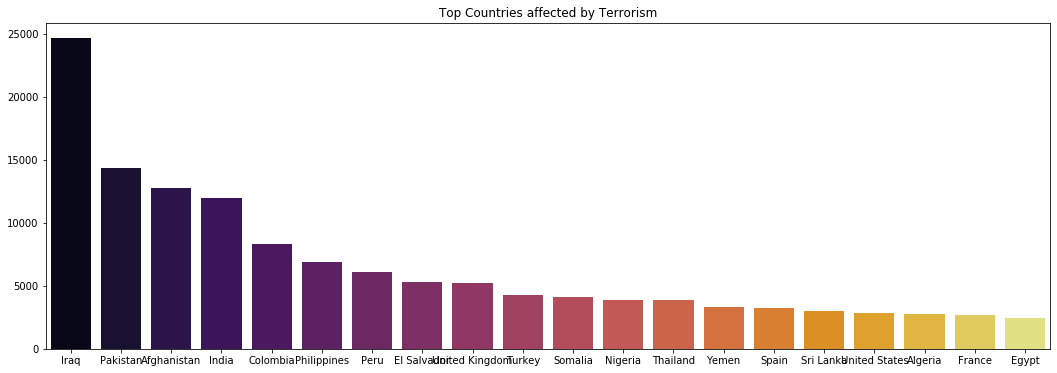

In [11]:
# To see ehich countries is highly affected by the groups
plt.subplots(figsize=(18,6))
sns.barplot(terror['Country'].value_counts()[:20].index,
            terror['Country'].value_counts()[:20].values,palette=('inferno'))
plt.title('Top Countries affected by Terrorism')
plt.show()

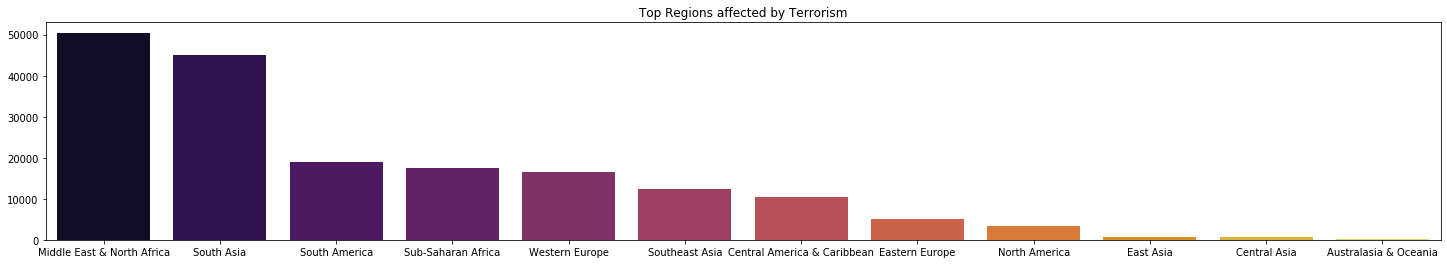

In [35]:
#Top regions affected by terror attacks
plt.subplots(figsize=(25,4))
sns.barplot(terror['Region'].value_counts()[:20].index,
            terror['Region'].value_counts()[:20].values,palette=('inferno'))
plt.title('Top Regions affected by Terrorism')
plt.show()

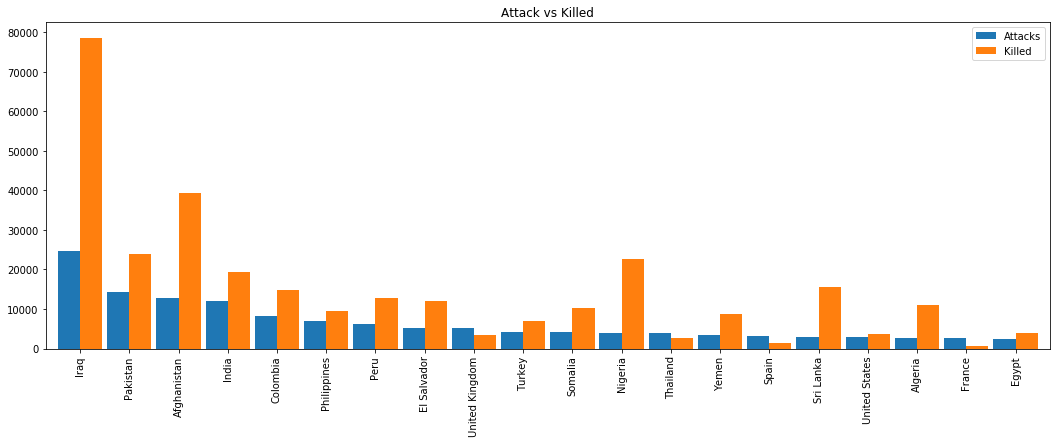

In [14]:
# Attack vs killed
attacks=terror['Country'].value_counts()[:20].to_frame()
attacks.columns=['Attacks']
killed=terror.groupby('Country')['Killed'].sum().to_frame()
attacks.merge(killed,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title('Attack vs Killed')
plt.show()

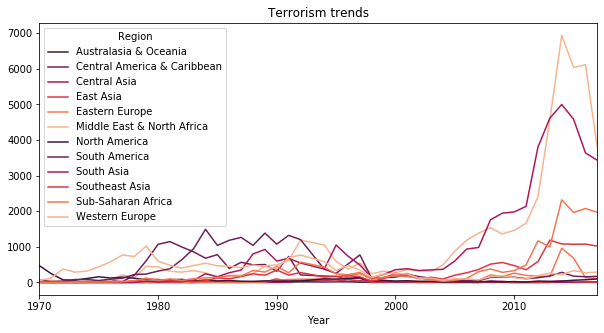

In [19]:
#to observe which region had highest affected by the attacks per year
region_attacks=pd.crosstab(terror.Year,terror.Region)
region_attacks.plot(color=sns.color_palette('rocket'))
fig=plt.gcf()
fig.set_size_inches(10,5)
plt.title('Terrorism trends')
plt.show()

Text(0.5, 1.0, 'Attack_Type vs Region')

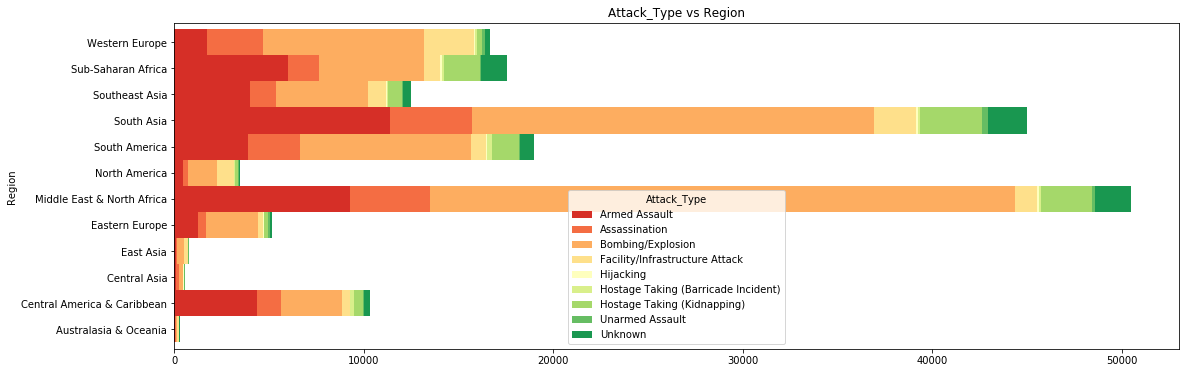

In [12]:
#Attack type vs Regions
pd.crosstab(terror.Region,terror.Attack_Type).plot.barh(stacked=True,width=1,color=sns.color_palette('RdYlGn',9))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title('Attack_Type vs Region')

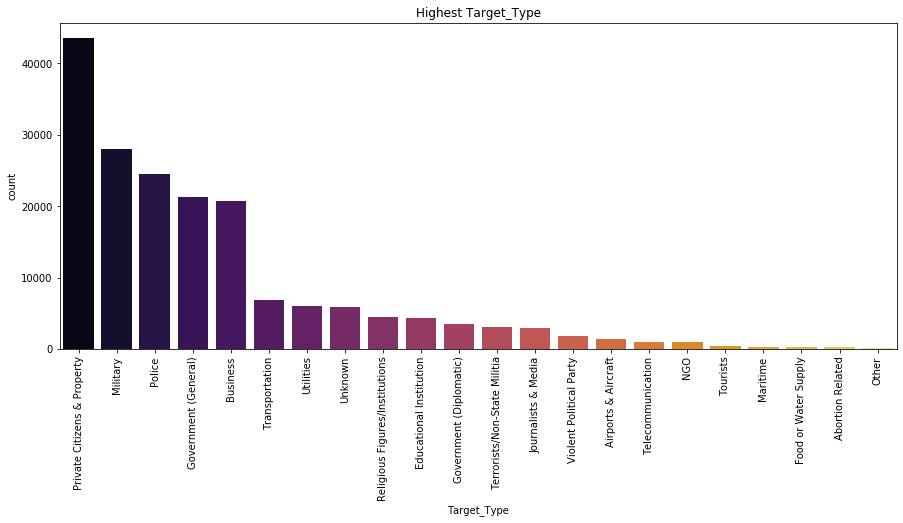

In [36]:
# Most commonly preferred target type by the terrorist group- Private citizens and property
plt.subplots(figsize=(15,6))
sns.countplot('Target_Type',data=terror,palette='inferno',order=terror['Target_Type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Highest Target_Type')
plt.show()

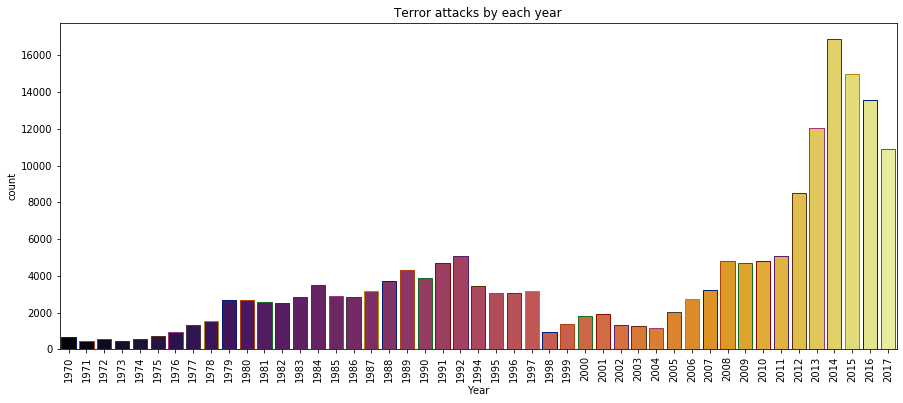

In [32]:
#terror attacks vs year- 2014 has the highest attack
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=terror,palette='inferno',edgecolor=sns.color_palette('dark',9))
plt.xticks(rotation=90)
plt.title('Terror attacks by each year')
plt.show()

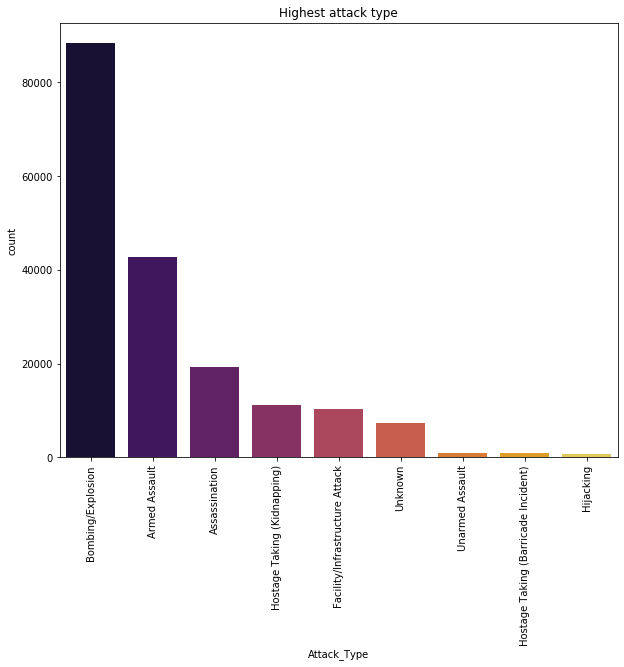

In [40]:
#To observe the preferred attack types- Commonly used is explosives
plt.subplots(figsize=(10,8))
sns.countplot('Attack_Type',data=terror,palette='inferno',order=terror['Attack_Type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Highest attack type')
plt.show()

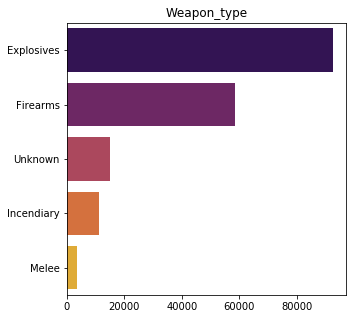

In [59]:
# Commonly used weapons by the terrorists
sns.barplot(terror['Weapon_type'].value_counts()[:5].values,
            terror['Weapon_type'].value_counts()[:5].index,palette=('inferno'))
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.title('Weapon_type')
plt.show()